In [80]:
from importlib import reload
from libs import io , cv2 , np

import preprocessing as pp
import roi as roi
import detection as detect
from classifier import H3T_Classifier

reload(roi)
reload(detect)


<module 'detection' from 'd:\\IP\\project\\real\\full_pipeline\\detection.py'>

In [81]:
# INIT

sign_imgs_corr = detect.get_corrleation_matrices("../dataset/corr_signs")


In [82]:

classifier = H3T_Classifier()

classifier.load_trained_model()




In [105]:
# Load the image
image = io.imread("../dataset/tc/00283.jpg")


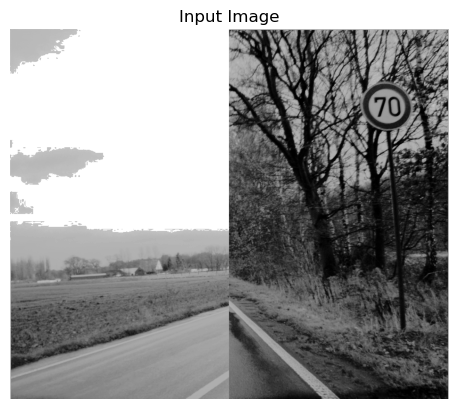

In [106]:

image = cv2.resize(image, (1280, 720))

#pp.show_images([image], ["Input Image"])

cropped_img = cv2.hconcat([image[:, :(image.shape[1] // 3)]  , image[:, 2 * (image.shape[1] // 3):]])

# Convert the image to grayscale
gray_image = pp.gray_image(cropped_img)

equalized_image = pp.HistogramEqualization(gray_image)

# Apply edge detection
edge_image = pp.LoGEdgeDetection(equalized_image)

# show pp images
pp.show_images([equalized_image.astype(np.uint8)], ["Input Image", "Cropped Image", "Edge Image"])


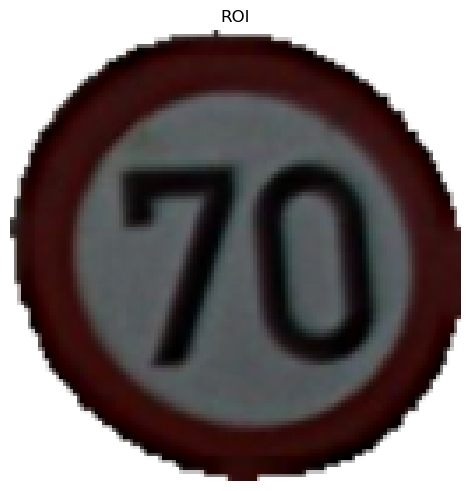

In [107]:

# Extract ROIs
rois = roi.extract_roi(edge_image , cropped_img)

# print(rois[0].shape)
#show rois

# new_images = []
# for i in range(len(rois)):
#     #  rois[i] = pp.gray_image(rois[i])
#      new_images.append(pp.HistogramEqualization(rois[i]))

pp.show_images(rois, ["ROI"])

0.28979126103791840.3078609750521173
0.30954027024877284

0.30059020100309497
0.2756108645256687
0.29456606119813444
[6, 0]
0


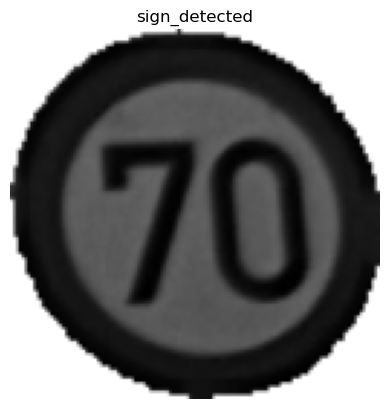

(128, 128)
prediction is ['30']


In [111]:
if (len(rois)  == 0):
    print("no rois")
else:
    detected_image_index = detect.detect_sign(rois, sign_imgs_corr)
    print(detected_image_index) 
    if detected_image_index != -1:
        gray_roi = pp.gray_image(rois[detected_image_index])
        #gray_roi = pp.HistogramEqualization(gray_roi)
        pp.show_images([gray_roi], ["sign_detected"])
        # print(gray_roi.shape)
        print(f'prediction is {classifier.predict(gray_roi)}')
    else:
        print("no sign detected")


